In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df3=pd.read_csv("Table1.csv")

In [3]:
df1=pd.read_csv("Table2.csv")

In [4]:
df2=pd.read_csv("Table3.csv")

In [5]:
df = df3.join(df1, how='outer').join(df2, how='outer')

In [6]:
df

,shoe_name,No_of_colour,catagory,prices,count_of_size,colours,style_code,reviews,features,ratings
0,Women's Firecamp™ Boot,4 Colors,Unisex,$100.00,5.0,Gold,L88MPKU,1.0,low-top,4.497
1,Women’s Minx™ Shorty III Boot,2 Colors,Unisex,$90.00,4.0,Black,E3KX07Y,67.0,comfortable,4.477
2,Men's Gunnison™ II Omni-Heat™ Boot,2 Colors,Unisex,$90.00,3.0,Silver,BZH4I9C,1.0,sneaker,4.399
3,Men's Firecamp™ Fleece Lined Shoe,3 Colors,Women,$100.00,4.0,WhiteAlpine,0VQJUQJ,67.0,flat,4.334
4,Women's Firecamp™ Fleece Lined Shoe,3 Colors,Women,$100.00,3.0,Pink,6MJDHVF,59.0,mesh,4.652
...,...,...,...,...,...,...,...,...,...,...
623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slip-on,NaN
624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lace-up,NaN
625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,canvas,NaN
626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lace-up,NaN


Here is our new Dartaframe having 628 rows and 10 columns in it, let us know about our data before proceeding further EDA

So the Data is having information about shoes collected from different website:
    
1. It's first column defines shoe name from different brands.

2. Second column is having colour available fro particular shoes, it's the number of colour.

3. Our third column is defining either shoe is for Men, Women or it's a Unisex which both can wear.

4. Fourth column is having price of a particular shoes.

5. Fifth column shows that how many sizes are available for particular shoe.

6. Our Sixth column is having colour available for the shoe now.

7. And the 7th column is having a particular style code for the shoe.

8. Our eighth column is having  number of review done by customer on that particular shoe.

9. Our ninth column is having cetain features of a shoe, which can affect it's prices.

10. Our tenth and last column is having star ratings of a particular shoes out of 5 

Other points to be remebered- 

Along with this we can also see that in the last of our dataframe we are having multiple null values and we have to treat them for better analysis and better model building which we'll do further.

In [16]:
df.head()

,shoe_name,No_of_colour,catagory,prices,count_of_size,colours,style_code,reviews,features,ratings
0,Women's Firecamp™ Boot,4 Colors,Unisex,$100.00,5.0,Gold,L88MPKU,1.0,low-top,4.497
1,Women’s Minx™ Shorty III Boot,2 Colors,Unisex,$90.00,4.0,Black,E3KX07Y,67.0,comfortable,4.477
2,Men's Gunnison™ II Omni-Heat™ Boot,2 Colors,Unisex,$90.00,3.0,Silver,BZH4I9C,1.0,sneaker,4.399
3,Men's Firecamp™ Fleece Lined Shoe,3 Colors,Women,$100.00,4.0,WhiteAlpine,0VQJUQJ,67.0,flat,4.334
4,Women's Firecamp™ Fleece Lined Shoe,3 Colors,Women,$100.00,3.0,Pink,6MJDHVF,59.0,mesh,4.652


Here we can see first 5 rows of our data by which we can see that which factor is affecting shoe price or rating and we'll also check this by further analysing the data

In [17]:
df.tail()

,shoe_name,No_of_colour,catagory,prices,count_of_size,colours,style_code,reviews,features,ratings
623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slip-on,NaN
624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lace-up,NaN
625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,canvas,NaN
626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lace-up,NaN
627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suede,NaN


Here we can see last 5 rows of our data and we can see we have maximum values as null except feature column which we need to treat further.

In [19]:
df.shape

(628, 10)

We can see that we are having 658 rows and 10 columns in our dataset, an all the 12 columns has been explained above, by which we can be sure that we are not missing any factor affecting price or ratings of any shoe.

In [20]:
df.columns

Index(['shoe_name', 'No_of_colour', 'catagory', 'prices', 'count_of_size',
       'colours', 'style_code', 'reviews', 'features', 'ratings'],
      dtype='object')

Here are names of all 10 columns which has been defined above.

In [21]:
df.dtypes

shoe_name         object
No_of_colour      object
catagory          object
prices            object
count_of_size    float64
colours           object
style_code        object
reviews          float64
features          object
ratings          float64
dtype: object

With the help of dtypes, we can see that we are having many columns having object datatypes and we need to convert them into integer for working on them affectively.

In [22]:
df.isnull().sum()

shoe_name        264
No_of_colour     487
catagory         264
prices           284
count_of_size      9
colours            9
style_code         9
reviews          324
features           0
ratings          329
dtype: int64

Let's remove null values from our data and let's also check impact on heatmap before and after removing null values

<Axes: >

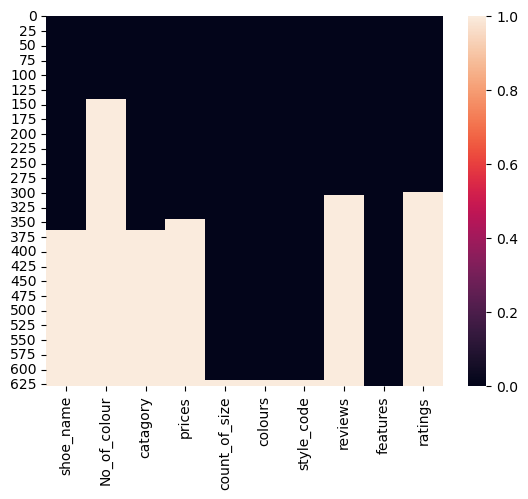

In [23]:
sns.heatmap(df.isnull())

Here is the heatmap before removing null values.

In [7]:
df1=df.dropna()

<Axes: >

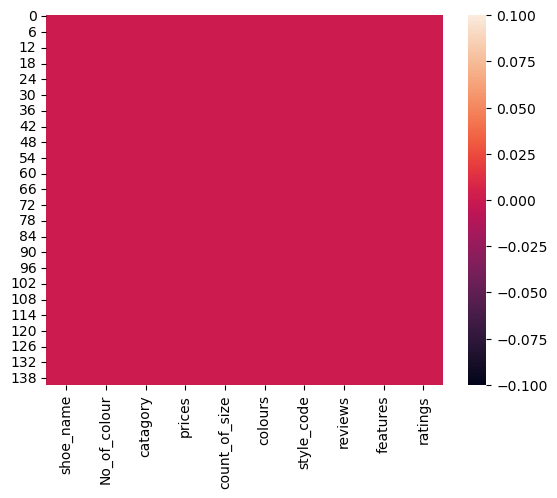

In [8]:
sns.heatmap(df1.isnull())

We can see the difference here, also as now we had lost data we need to use it wisely.

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shoe_name      141 non-null    int32  
 1   No_of_colour   141 non-null    int32  
 2   catagory       141 non-null    int32  
 3   prices         141 non-null    int32  
 4   count_of_size  141 non-null    float64
 5   colours        141 non-null    int32  
 6   reviews        141 non-null    float64
 7   features       141 non-null    int32  
 8   ratings        141 non-null    float64
dtypes: float64(3), int32(6)
memory usage: 7.7 KB


We can also analyse null values and datatype by above function.

In [30]:
#Let's check unique values in our dataframe
df1.nunique().to_frame("Unique values")

,Unique values
shoe_name,141
No_of_colour,7
catagory,3
prices,28
count_of_size,4
colours,6
style_code,141
reviews,65
features,16
ratings,126


We can see we are having much null calues in object column and it is good for analysis further.

In [9]:
#Let's check for duplicates
df1.duplicated().sum()

0

We can see that we do not have a single duplicated row, which is beneficial for us as we can not bear anymore dataloss.

In [36]:
df1.describe()

,count_of_size,reviews,ratings
count,141.000000,141.000000,141.000000
mean,4.581560,115.858156,4.417681
std,1.102957,193.937088,0.248724
min,3.000000,1.000000,3.591000
25%,4.000000,5.000000,4.300000
50%,5.000000,31.000000,4.467000
75%,5.000000,102.000000,4.600000
max,6.000000,955.000000,4.900000


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above date.

We can see that the count of all columns are same it means our data is perfect and ready to work with.

We can see that there is difference between mean and median of reviews which means it is right skewed which we'll treat further.

By analysing the data we can see a huge difference between 75th percentile and maximum value of review which can be treated by simple z score method

By analysing data we can see that style_code is not playing any role in prediction so let us drop that column.

In [10]:
df1.drop(columns=['style_code'], inplace=True)

Now let's change our object columns to integer to have a better understanding and analysis of data

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [12]:
df1['shoe_name'] = label_encoder.fit_transform(df1['shoe_name'])
df1['catagory'] = label_encoder.fit_transform(df1['catagory'])
df1['features'] = label_encoder.fit_transform(df1['features'])
df1['colours'] = label_encoder.fit_transform(df1['colours'])

In [13]:
df1

,shoe_name,No_of_colour,catagory,prices,count_of_size,colours,reviews,features,ratings
0,94,4 Colors,1,$100.00,5.0,1,1.0,8,4.497
1,139,2 Colors,1,$90.00,4.0,0,67.0,2,4.477
2,35,2 Colors,1,$90.00,3.0,4,1.0,13,4.399
3,26,3 Colors,2,$100.00,4.0,5,67.0,3,4.334
4,96,3 Colors,2,$100.00,3.0,3,59.0,9,4.652
...,...,...,...,...,...,...,...,...,...
136,134,1 Color,1,$119.95,3.0,2,64.0,7,4.142
137,108,1 Color,1,$140.00,6.0,3,98.0,8,4.700
138,11,3 Colors,1,$40.00,3.0,4,14.0,13,4.300
139,62,3 Colors,1,$170.00,5.0,4,671.0,11,4.754


In [14]:
df1['prices'] = df1['prices'].str.replace('$', '')

In [15]:
df1['No_of_colour'] = df1['No_of_colour'].str.replace('Colors', '')

In [16]:
df1['No_of_colour'] = df1['No_of_colour'].str.replace('Color', '')

In [17]:
df1['prices'] = pd.to_numeric(df1['prices'])

In [18]:
df1['No_of_colour'] = pd.to_numeric(df1['No_of_colour'])

In [19]:
df1.dtypes

shoe_name          int32
No_of_colour       int64
catagory           int32
prices           float64
count_of_size    float64
colours            int32
reviews          float64
features           int32
ratings          float64
dtype: object

We can see we have changed every column data to executable for machine learning and further analysis.

In [82]:
#Let's have a look on our Data now
df1

,shoe_name,No_of_colour,catagory,prices,count_of_size,colours,reviews,features,ratings
0,94,4,1,100.00,5.0,1,1.0,8,4.497
1,139,2,1,90.00,4.0,0,67.0,2,4.477
2,35,2,1,90.00,3.0,4,1.0,13,4.399
3,26,3,2,100.00,4.0,5,67.0,3,4.334
4,96,3,2,100.00,3.0,3,59.0,9,4.652
...,...,...,...,...,...,...,...,...,...
136,134,1,1,119.95,3.0,2,64.0,7,4.142
137,108,1,1,140.00,6.0,3,98.0,8,4.700
138,11,3,1,40.00,3.0,4,14.0,13,4.300
139,62,3,1,170.00,5.0,4,671.0,11,4.754


In [85]:
#Great! let's check for correaltion now
df1.corr()

,shoe_name,No_of_colour,catagory,prices,count_of_size,colours,reviews,features,ratings
shoe_name,1.000000,-0.016134,0.056809,-0.069637,0.008244,0.036768,-0.042938,0.040420,0.155486
No_of_colour,-0.016134,1.000000,-0.038898,-0.012533,-0.135039,0.001800,-0.083111,0.088001,0.005074
catagory,0.056809,-0.038898,1.000000,-0.006302,-0.018534,0.134285,0.009536,-0.072637,0.078012
prices,-0.069637,-0.012533,-0.006302,1.000000,0.031645,0.085665,-0.060908,0.021886,-0.043594
count_of_size,0.008244,-0.135039,-0.018534,0.031645,1.000000,0.119216,0.057891,-0.023710,-0.000022
colours,0.036768,0.001800,0.134285,0.085665,0.119216,1.000000,0.100867,0.104105,-0.055059
reviews,-0.042938,-0.083111,0.009536,-0.060908,0.057891,0.100867,1.000000,-0.020845,0.053576
features,0.040420,0.088001,-0.072637,0.021886,-0.023710,0.104105,-0.020845,1.000000,-0.078740
ratings,0.155486,0.005074,0.078012,-0.043594,-0.000022,-0.055059,0.053576,-0.078740,1.000000


By the above we can see that we do not have any column having correlation with ease other which is great as we sodo not have to face any multicollinearity issue.

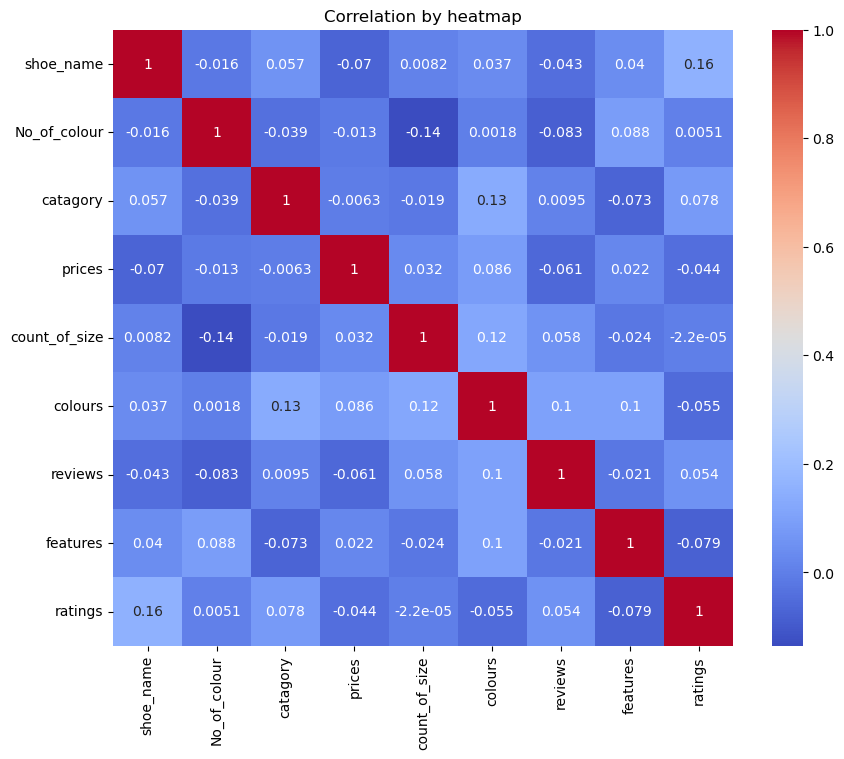

In [86]:
correlation = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

The same we can check with the help of above heatmap, as the blocks are in blue we do not have correlation.

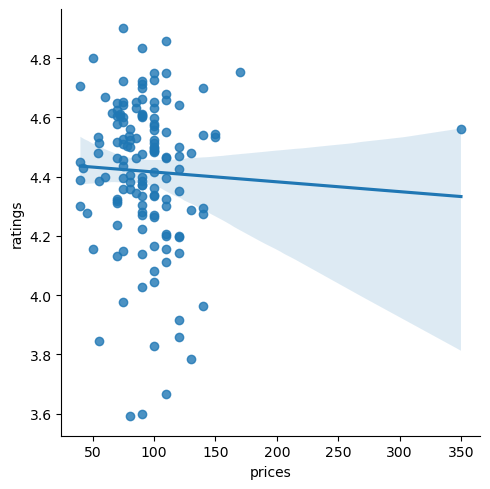

In [88]:
sns.lmplot(x='prices',y='ratings',data=df1,palette='colorblind')

With the above graph we can see that shoes having low cost is having high ratings, let's analus further.

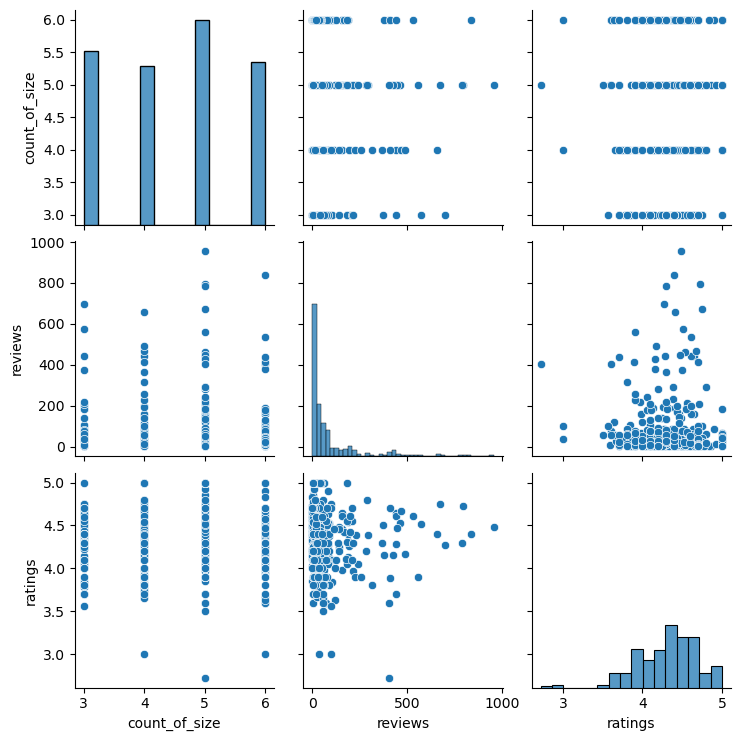

In [89]:
#Let's make a pairplot for complete analysis of our data
sns.pairplot(data=df,palette="dark1")

With the analysis of scatter plots we have got through this pair plot, we can say that economy some pof our columns are having a good positive correlation with prices and ratings which will be helpful for us in training our model and predicting the data.
We can also see that we are having outliers in some of our columns.
As the data is not too much scattered we will try to use linear regression however if it would not work properly we would also go for Decision tree and Random forest.

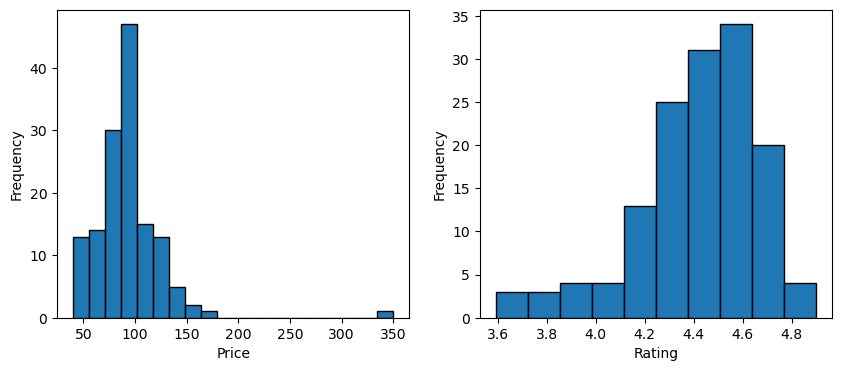

In [94]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df1['prices'], bins=20, edgecolor="black")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(df1['ratings'], bins=10, edgecolor="black")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

With the help of above graph we can see that our maximum shoes is having price around $ 80 to $100 and maximum ratings are between 4.3 to 4.7

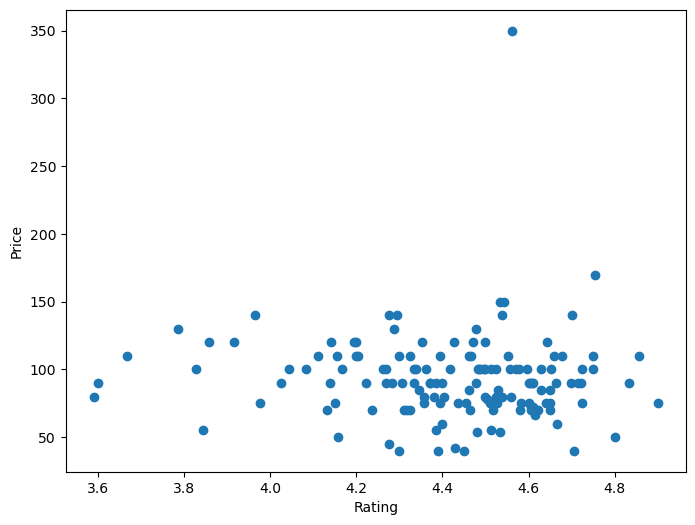

In [96]:
#Let's make a seperate scatter plot for price and ratings
plt.figure(figsize=(8, 6))
plt.scatter(df1['ratings'], df1['prices'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

With the help of above plt we can clearly see that shoes below $ 100 is having maximum good ratings.

So here we have complete both graphiocal and non-graphical analysis of our data and got to know many points, now let's remove outliers from our data and check for skewness then we'll be ready to build a model for both prices and ratings.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'shoe_name'),
  Text(2, 0, 'No_of_colour'),
  Text(3, 0, 'catagory'),
  Text(4, 0, 'prices'),
  Text(5, 0, 'count_of_size'),
  Text(6, 0, 'colours'),
  Text(7, 0, 'reviews'),
  Text(8, 0, 'features'),
  Text(9, 0, 'ratings')])

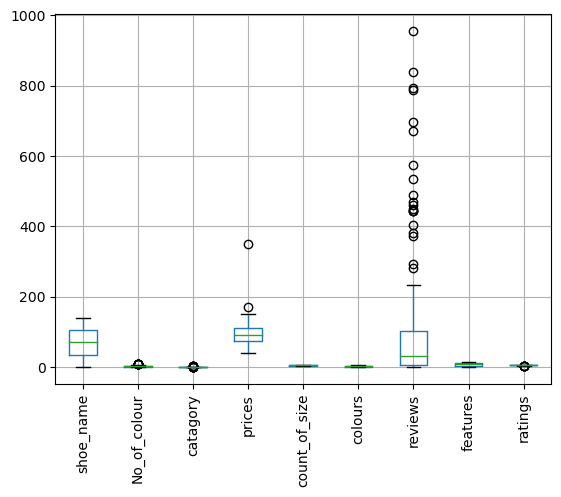

In [97]:
#first let's check outliers with the help pf boxplot
df1.boxplot()
plt.xticks(rotation=90)

With the help of above box plot we can see that we have outlier in only one column that is reviews rest all the columns are not having outlier's and we'll check it through z-score method.

In [20]:
#Let's find outlier with Zscore method
outliers=df1[['reviews','prices']]
z=np.abs(zscore(outliers))
z

,reviews,prices
0,0.594356,0.206138
1,0.252826,0.100557
2,0.594356,0.100557
3,0.252826,0.206138
4,0.294224,0.206138
...,...,...
136,0.268350,0.817992
137,0.092410,1.432914
138,0.527085,1.634027
139,2.872689,2.352996


In [21]:
np.where(z>3)

(array([ 51, 102, 103, 114, 115, 126], dtype=int64),
 array([1, 0, 0, 0, 0, 0], dtype=int64))

We have only detected one outlier in our dataset, let us also remove it to make sure we get more accurate prediction of our data.

In [22]:
dff=df1[(z<3).all(axis=1)]

In [23]:
dff.shape

(135, 9)

In [24]:
Q1 = dff['reviews'].quantile(0.25)
Q3 = dff['reviews'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = dff[~((dff['reviews'] < lower_bound) | (dff['reviews'] > upper_bound))]

In [25]:
Q1 = dff['prices'].quantile(0.25)
Q3 = dff['prices'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = dff[~((dff['prices'] < lower_bound) | (dff['prices'] > upper_bound))]

In [26]:
df2.shape

(128, 9)

We have tried to remove outliers with both method let's check further.

In [27]:
df2.skew()

shoe_name       -0.003249
No_of_colour     1.614789
catagory        -0.397714
prices          -0.344483
count_of_size   -0.158050
colours         -0.053451
reviews          2.028975
features        -0.067356
ratings         -1.027475
dtype: float64

We can see that No_of_colour, prices and reviews are having positive skewness and ratings have negative skewness, and we have to do treatment for them.

In [28]:
# let's use cube root methos to remove skewness from positively skewed columns.
df2['No_of_colour']=np.cbrt(df2['No_of_colour'])

In [36]:
df2['reviews']=np.cbrt(df2['reviews'])

In [37]:
df2.skew()

shoe_name       -0.003249
No_of_colour     0.730810
catagory        -0.397714
prices          -0.344483
count_of_size   -0.158050
colours         -0.053451
reviews          0.694422
features        -0.067356
ratings         -0.033255
dtype: float64

Perfect! we have successfully removed skewness from our positively skewed columns now let's do treatment for rating which is negatively skewed.

In [31]:
from scipy import stats

In [32]:
transformed_data, lambda_value = stats.boxcox(df2['ratings'])

In [33]:
df2['ratings'] = transformed_data


In [38]:
#Let's check skewnesss now
df2.skew()

shoe_name       -0.003249
No_of_colour     0.730810
catagory        -0.397714
prices          -0.344483
count_of_size   -0.158050
colours         -0.053451
reviews          0.694422
features        -0.067356
ratings         -0.033255
dtype: float64

Brilliant!

Here we go - Everyting has been done which we need to do in datapreprocessing let's Summarize.

First we have imported our different dataframes and combined them, understod different components and factor affeting our target variable.

Also changed our catagorical columns into numerical to fit them in our model and work with them.

We've done different kinds of non grahical EDA to get more insights from dataset.

Then we went for graphical analysis of our data which helped us to get more visualised information and insights.

After which we came to data preprocessing in which we've checked outliers by box plot and removed it with the help of Z score method.

As a final stpe we've've checked for skewness in our data and also removed it by squareroot method available in numpy and boxcox method available in stats.

Now lets split and fit values to get result by checking different models for prediction of prices then we'll move forward for ratings.

In [46]:
#Let's split our data in features and target first then we will keep it in X and Y variable

features = ['shoe_name','catagory','No_of_colour', 'count_of_size','colours', 'reviews','features','prices']
target = 'ratings'

In [47]:
x = df2[features]
y = df2[target]

In [48]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (128, 8)
dimension of dependent variable: (128,)


We can see that our features varibale that is X is having 136 rows and 8 column, and target variable that is Y is also having 136 rows however only 1 column that is prices because it is our target variable, which means we are going good till now, let's find best random state now after importing neccessary libraries.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [50]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("maximum r2 score is ", maxAccu,"on Randome_state",maxRS)        

maximum r2 score is  0.13808501652860705 on Randome_state 0


In [51]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: -0.5525256059790904
R2 score on training Data: 100.0
Mean Absolute Error: 977.3831523709467
Mean Squared Error: 1465614.7029720973
Root Mean Squared Error: 1210.6257485168971


In [181]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_RFR=rfr.predict (x_test)
pred_train=rfr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RFR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: -0.2961388754916896
R2 score on training Data: 83.17974235148358
Mean Absolute Error: 890.2051321323656
Mean Squared Error: 1312887.490396996
Root Mean Squared Error: 1145.8130259326763


It seems there is overfitting in our model, and for that we'll use Lasso and Ridge models further and I am also checking preprocessing once again here.

I have again checked preprocessing and removed outliers with interquartile range now let's check Ridge and Lasso further.

In [182]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: -0.3219110913944425
R2 score on training Data: 100.0
Mean Absolute Error: 880.8760858975121
Mean Squared Error: 1338992.733051414
Root Mean Squared Error: 1157.1485354315641


In [183]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: -0.38765422623314616
R2 score on training Data: 93.07686689905256
Mean Absolute Error: 882.772712501636
Mean Squared Error: 1405585.3960301199
Root Mean Squared Error: 1185.573867808379


In [184]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: -0.13545433026716713
R2 score on training Data: 10.286263505593752
Mean Absolute Error: 802.8632384335549
Mean Squared Error: 1150126.5908403199
Root Mean Squared Error: 1072.4395511357832


In [186]:
from sklearn.linear_model import Lasso
la= Lasso()
la.fit(x_train,y_train)
pred_LA=la.predict (x_test)
pred_train=la.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_LA))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_LA))
print('Mean Squared Error:',mean_squared_error(y_test, pred_LA))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_LA)))

R2 score: -0.13542209139174477
R2 score on training Data: 10.294409989778996
Mean Absolute Error: 803.0101394380571
Mean Squared Error: 1150093.935376429
Root Mean Squared Error: 1072.4243261771103


As we have a less number of data is is not giving good r2 score however we've followed everything possible, we will cross validate accuracy by cross validation method and by following hyper parameter tunning.

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[-3.56256947 -0.82001105 -1.02677622 -0.80693221 -0.9276232 ]
-1.428782427808569
Difference between R2 score and cross validation score is : 141.88028837152774


In [189]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[-0.38484173 -0.34308849 -0.17936711 -0.13697883 -0.50964785]
-0.31078480182363183
Difference between R2 score and cross validation score is : 30.782341306871494


In [190]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[-0.5854372  -0.24939694 -0.23004514 -0.15514325 -0.60095992]
-0.3641964914752046
Difference between R2 score and cross validation score is : 36.09773805612602


In [191]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[-0.60853341 -0.68267385 -0.60079199  0.02353058 -0.48885236]
-0.47146420615250617
Difference between R2 score and cross validation score is : 46.758766389017474


In [192]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[ 0.17504695 -0.10304079 -0.08557052 -0.02418134 -0.33541281]
-0.07463170173855245
Difference between R2 score and cross validation score is : 7.327715843588077


In [193]:
score = cross_val_score(la,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_LA)-score.mean()*100))

[ 0.17496132 -0.10744523 -0.08437939 -0.02387277 -0.33586761]
-0.0753207374343535
Difference between R2 score and cross validation score is : 7.396651652043604


We can see that our prediction is working well in Ridge model and able to predict best data.

In [194]:
#Lets test our data by grid search
from sklearn.model_selection import GridSearchCV

In [195]:
param={'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
       'solver':['auto','svd','cholesky','lsqr','sag','lbfgs'],
       'positive':[False,True],
       'random_state':[1,4,10,20]}
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'lbfgs']})

In [196]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 4,
 'solver': 'sag'}

In [197]:
Model=Ridge(alpha=2,fit_intercept=True,positive=False,random_state=4,solver='sag')

In [198]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: -0.13374845786543088
Mean Absolute Error: 801.7128449536775
Mean Squared Error: 1148398.6752760229
Root Mean Squared Error: 1071.6336478834653


In [229]:
import pickle
filename='ratings_Shoe.pkl'
pickle.dump(Model,open(filename,'wb'))

Now let's predict price with the same model, it is just giving low accuracy because of less data.

In [199]:
features = ['shoe_name', 'catagory','No_of_colour', 'count_of_size','colours', 'reviews','features','ratings']
target = 'prices'

In [200]:
x = df2[features]
y = df2[target]

In [201]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (139, 8)
dimension of dependent variable: (139,)


In [202]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("maximum r2 score is ", maxAccu,"on Randome_state",maxRS)        

maximum r2 score is  0.11655652374817427 on Randome_state 0


In [203]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

In [204]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: -0.8550709973605186
R2 score on training Data: 100.0
Mean Absolute Error: 23.001190476190477
Mean Squared Error: 1080.6550595238095
Root Mean Squared Error: 32.87331835278893


In [205]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_RFR=rfr.predict (x_test)
pred_train=rfr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RFR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.00206512260036551
R2 score on training Data: 81.3595742617357
Mean Absolute Error: 18.85267857142857
Mean Squared Error: 581.3380597678572
Root Mean Squared Error: 24.110953107827513


In [206]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: -0.013610108426049372
R2 score on training Data: 100.0
Mean Absolute Error: 19.228273809523813
Mean Squared Error: 590.4695257559525
Root Mean Squared Error: 24.29957871560642


In [207]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: -0.40844097908154775
R2 score on training Data: 94.03352281909858
Mean Absolute Error: 20.908286122738122
Mean Squared Error: 820.47472697852
Root Mean Squared Error: 28.643930019788137


In [208]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: -0.062143419182676185
R2 score on training Data: 7.513959229969924
Mean Absolute Error: 19.28394964789889
Mean Squared Error: 618.7421729480089
Root Mean Squared Error: 24.87452859750329


In [209]:
from sklearn.linear_model import Lasso
la= Lasso()
la.fit(x_train,y_train)
pred_LA=la.predict (x_test)
pred_train=la.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_LA))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_LA))
print('Mean Squared Error:',mean_squared_error(y_test, pred_LA))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_LA)))

R2 score: -0.020370829383582256
R2 score on training Data: 6.5710962278319744
Mean Absolute Error: 18.78813751315582
Mean Squared Error: 594.407923434091
Root Mean Squared Error: 24.38048242824762


Let's perform cross validation 

In [210]:
from sklearn.model_selection import cross_val_score

In [211]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[-1.60286224 -1.40129751 -1.25747247 -0.54148309 -1.23287319]
-1.2071976983624464
Difference between R2 score and cross validation score is : 119.86469883888412


In [212]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[-0.26420414  0.00833549 -0.05816002 -0.12374606 -0.14816471]
-0.11718788706777299
Difference between R2 score and cross validation score is : 11.720853829377663


In [213]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[-0.3953547  -0.35506475 -0.17709359 -0.27514736 -0.19348789]
-0.279229658979331
Difference between R2 score and cross validation score is : 27.90935578950705


In [214]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[-0.88205095 -0.44337524 -1.14992769 -0.51977924 -0.32301215]
-0.6636290546349548
Difference between R2 score and cross validation score is : 65.95446448441393


In [215]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[-0.00965957 -0.36764735 -0.42986623 -0.06055946 -0.02782009]
-0.17911054172153928
Difference between R2 score and cross validation score is : 17.848910752971253


In [216]:
score = cross_val_score(la,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_LA)-score.mean()*100))

[ 0.00352413 -0.26641435 -0.41813897 -0.03007854 -0.02034388]
-0.1462903232492086
Difference between R2 score and cross validation score is : 14.608661495537278


We can see that our prediction is working well in Random forest regressor model and able to predict best data.

In [217]:
#Lets test our data by grid search
from sklearn.model_selection import GridSearchCV

In [218]:
param={'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'sqrt']}
gscv=GridSearchCV(RandomForestRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [219]:
gscv.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}

In [220]:
Model=RandomForestRegressor(max_depth= 5, max_features= 'sqrt', n_estimators=  200)

In [221]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.022322265205764524
Mean Absolute Error: 18.938677922570115
Mean Squared Error: 569.5374420668811
Root Mean Squared Error: 23.864983596618732


Now let's save our model by pickle method

In [223]:
import pickle
filename='price_Shoe.pkl'
pickle.dump(Model,open(filename,'wb'))

# Thank you